In [17]:
from astropy.io import fits
import numpy as np
from astropy.table import Table
import pandas as pd
import glob
from astropy.table import vstack
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

In [18]:
df_disk = pd.read_csv("../Ha-emitters-disk/Halpha-disk_splus_Mine_PerField_total-unique_simbad.csv")

In [19]:
df_disk

,NUMBER,ALPHA,DELTA,u,uerr,g,gerr,r,rerr,i,...,R_x,J,H,K,u_x,g_x,r_xa,i_x,z_x,angDist
0,4050,106.201938,-10.562264,99.000000,99.000000,19.585411,0.055907,17.542591,0.009629,16.445004,...,NaN,13.377,12.023,11.099,NaN,NaN,NaN,NaN,NaN,0.090307
1,8710,106.200785,-10.505256,19.037668,0.043265,19.354897,0.045797,18.230957,0.014984,17.535788,...,NaN,15.193,14.483,13.797,NaN,NaN,NaN,NaN,NaN,0.083959
2,12974,106.225421,-10.450525,20.789003,0.188930,19.810198,0.066266,18.429539,0.017234,17.340002,...,NaN,15.028,14.303,13.978,NaN,NaN,NaN,NaN,NaN,0.044800
3,19125,106.249120,-10.370369,21.454640,0.340462,20.022272,0.077668,18.352077,0.016190,17.283308,...,NaN,15.029,14.076,13.808,NaN,NaN,NaN,NaN,NaN,0.044590
4,20361,106.256355,-10.355068,21.516994,0.359568,19.903840,0.069749,18.329475,0.015886,17.269990,...,NaN,14.702,13.744,13.420,NaN,NaN,NaN,NaN,NaN,0.053725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,180069,131.182890,-48.239834,19.714346,0.063980,15.717732,0.003996,13.083560,0.000897,12.470163,...,NaN,8.561,7.227,6.561,NaN,NaN,NaN,NaN,NaN,0.061768
576,170993,130.653605,-49.644282,17.827497,0.023789,14.414744,0.002162,13.077248,0.000945,12.851273,...,13.351,10.389,9.548,9.315,NaN,14.49,13.023,12.317,NaN,0.048551
577,131281,134.169156,-55.334249,18.874880,0.049661,14.633573,0.002369,13.020830,0.000899,12.401828,...,NaN,9.408,8.443,8.098,NaN,NaN,NaN,NaN,NaN,0.094722
578,139983,134.281547,-55.297492,15.595540,0.005332,14.215619,0.001887,13.871863,0.001369,13.724527,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.075361


In [20]:
# Define the number of bins and the range of r-band magnitudes
num_bins = 50
mag_range_d = (min(df_disk["r"].min(), df_disk["r"].min()), max(df_disk["r"].max(), df_disk["r"].max()))

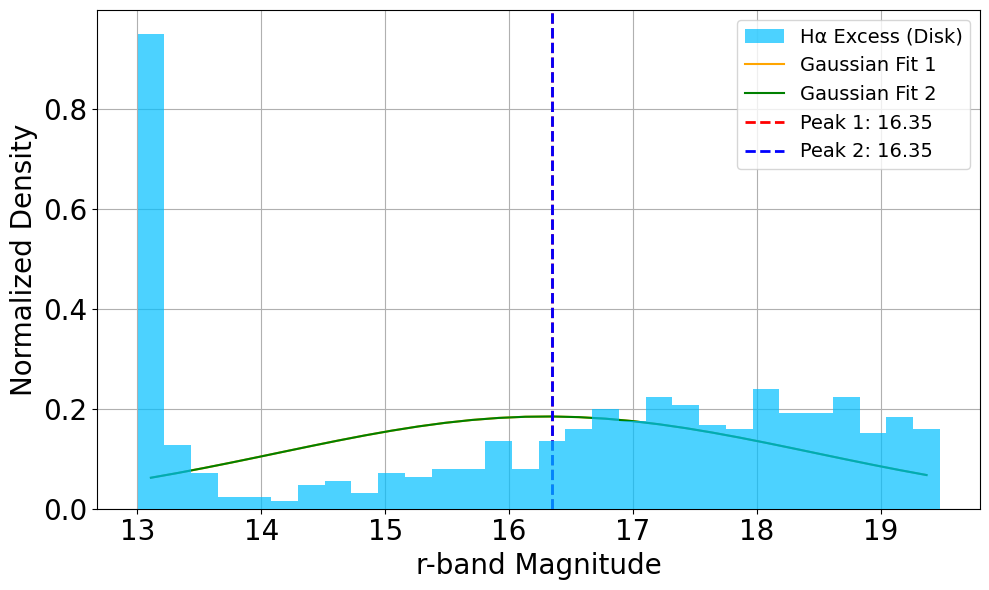

Peak 1 value: 0.1846 at magnitude 16.35
Peak 2 value: 0.1846 at magnitude 16.35


In [23]:
# Plot side-by-side histograms of r-band magnitudes for Hα emitters and all objects
plt.figure(figsize=(10, 6))
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)

# Plot histogram of r-band magnitudes for Hα emitters (assuming df_disk["r"] contains these values)
num_bins = 30  # Adjust as needed
hist, bin_edges, _ = plt.hist(df_disk["r"], bins=num_bins, alpha=0.7, color='deepskyblue', label='Hα Excess (Disk)', density=True, zorder=3)

# Fit Gaussian mixture model (assuming two components)
params = norm.fit(df_disk["r"])
mu1, std1 = params  # Mean and standard deviation of first Gaussian

# Estimate second Gaussian parameters using mean and std deviation of data minus first Gaussian
filtered_data = df_disk["r"][(df_disk["r"] > (mu1 - 3*std1)) & (df_disk["r"] < (mu1 + 3*std1))]
params2 = norm.fit(filtered_data)
mu2, std2 = params2  # Mean and standard deviation of second Gaussian

# Generate fitted Gaussian curves
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
pdf1 = norm.pdf(bin_centers, mu1, std1)
pdf2 = norm.pdf(bin_centers, mu2, std2)

# Plot Gaussian fits
plt.plot(bin_centers, pdf1, label='Gaussian Fit 1', color='orange')
plt.plot(bin_centers, pdf2, label='Gaussian Fit 2', color='green')

# Find peaks of the fitted Gaussian distributions
peak_idx1 = np.argmax(pdf1)
peak_value1 = pdf1[peak_idx1]
peak_position1 = bin_centers[peak_idx1]

peak_idx2 = np.argmax(pdf2)
peak_value2 = pdf2[peak_idx2]
peak_position2 = bin_centers[peak_idx2]

plt.axvline(x=peak_position1, color='red', linestyle='--', label=f'Peak 1: {peak_position1:.2f}', linewidth=2)
plt.axvline(x=peak_position2, color='blue', linestyle='--', label=f'Peak 2: {peak_position2:.2f}', linewidth=2)

plt.xlabel("r-band Magnitude", fontsize=20)
plt.ylabel("Normalized Density", fontsize=20)
plt.legend(fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

# Print peak information
print(f"Peak 1 value: {peak_value1:.4f} at magnitude {peak_position1:.2f}")
print(f"Peak 2 value: {peak_value2:.4f} at magnitude {peak_position2:.2f}")

In [35]:
mask_r = df_disk["r"] <= 13.5
df_disk_bright =  df_disk[mask_r]
df_disk_bright

,NUMBER,ALPHA,DELTA,u,uerr,g,gerr,r,rerr,i,...,R_x,J,H,K,u_x,g_x,r_xa,i_x,z_x,angDist
362,117527,105.888294,-9.357867,15.401183,0.004208,14.217123,0.001791,13.499310,0.001122,13.190541,...,NaN,12.388,12.073,11.755,NaN,NaN,NaN,NaN,NaN,0.017903
363,89032,107.410617,-9.630540,19.310925,0.087378,14.979483,0.002718,13.144484,0.000938,12.857545,...,NaN,8.965,7.827,7.443,NaN,NaN,NaN,NaN,NaN,0.084908
365,67973,104.765057,-11.311195,17.329515,0.012246,14.287910,0.001821,13.068461,0.000902,12.739964,...,13.078,10.427,9.720,9.487,NaN,14.315,12.964,12.331,NaN,0.026665
374,25783,107.031543,-13.222812,14.942812,0.003170,13.547996,0.001354,13.088689,0.000979,13.165680,...,NaN,12.117,11.907,11.685,NaN,NaN,NaN,NaN,NaN,0.030382
375,32094,107.052120,-13.177082,15.664564,0.004539,14.083913,0.001743,13.473608,0.001171,13.438285,...,NaN,12.216,12.000,11.772,NaN,NaN,NaN,NaN,NaN,0.028884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574,166149,130.476387,-48.312766,17.048315,0.010157,14.058581,0.001624,13.004334,0.000863,12.595700,...,NaN,10.654,9.990,9.819,NaN,NaN,NaN,NaN,NaN,0.061000
575,180069,131.182890,-48.239834,19.714346,0.063980,15.717732,0.003996,13.083560,0.000897,12.470163,...,NaN,8.561,7.227,6.561,NaN,NaN,NaN,NaN,NaN,0.061768
576,170993,130.653605,-49.644282,17.827497,0.023789,14.414744,0.002162,13.077248,0.000945,12.851273,...,13.351,10.389,9.548,9.315,NaN,14.490,13.023,12.317,NaN,0.048551
577,131281,134.169156,-55.334249,18.874880,0.049661,14.633573,0.002369,13.020830,0.000899,12.401828,...,NaN,9.408,8.443,8.098,NaN,NaN,NaN,NaN,NaN,0.094722


In [36]:
np.unique(df_disk_bright["main_type"])

array(['**', 'Be*', 'C*', 'Cepheid_Candidate', 'EB*', 'EB*_Candidate',
       'Em*', 'LP*_Candidate', 'LPV*', 'Mira', 'Orion_V*', 'PulsV*',
       'PulsV*delSct', 'RGB*', 'SB*', 'Star', 'V*', 'V*?_Candidate',
       'YSO', 'YSO_Candidate', 'deltaCep'], dtype=object)

In [37]:
# Count the number of objects of each type and store it in a dictionary
dict_simbad_ = df_disk_bright["main_type"].value_counts().to_dict()

In [38]:
dict_simbad_

{'Star': 75,
 'SB*': 17,
 'V*': 8,
 'Em*': 5,
 'EB*_Candidate': 4,
 'C*': 4,
 'LPV*': 3,
 'Be*': 3,
 'LP*_Candidate': 3,
 '**': 2,
 'YSO_Candidate': 2,
 'RGB*': 2,
 'PulsV*': 2,
 'EB*': 2,
 'PulsV*delSct': 1,
 'deltaCep': 1,
 'V*?_Candidate': 1,
 'Cepheid_Candidate': 1,
 'Orion_V*': 1,
 'YSO': 1,
 'Mira': 1}

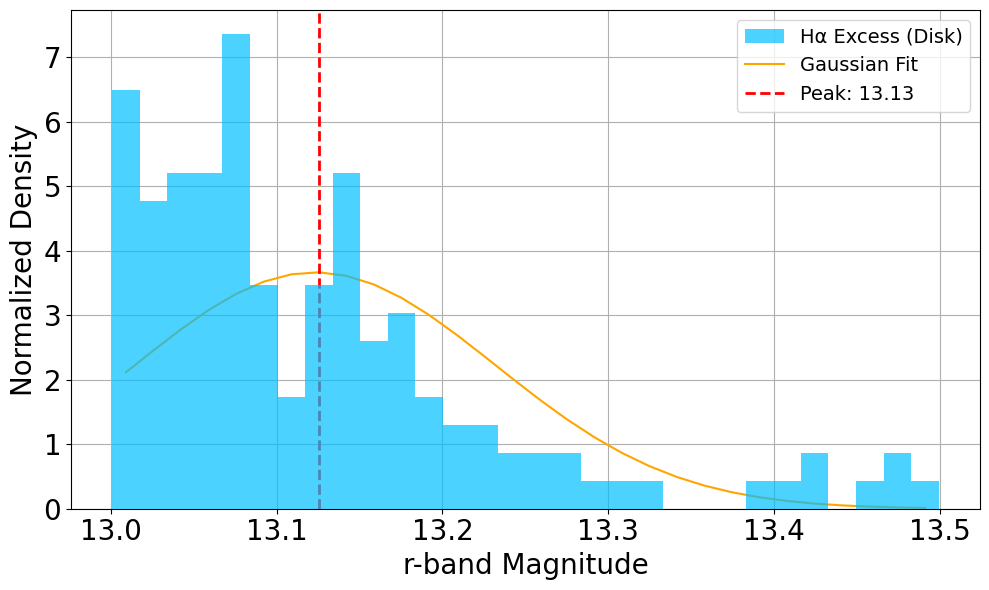

Peak value: 3.6638 at magnitude 13.13


In [39]:
# Plot side-by-side histograms of r-band magnitudes for Hα emitters and all objects
plt.figure(figsize=(10, 6))
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)

# Plot histogram of r-band magnitudes for Hα emitters (assuming df_disk["r"] contains these values)
num_bins = 30  # Adjust as needed
hist, bin_edges, _ = plt.hist(df_disk_bright["r"], bins=num_bins, alpha=0.7, color='deepskyblue', label='Hα Excess (Disk)', density=True, zorder=3)

# Fit Gaussian distributions
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
params = norm.fit(df_disk_bright["r"])
pdf_fitted = norm.pdf(bin_centers, *params)
plt.plot(bin_centers, pdf_fitted, label='Gaussian Fit', color='orange')

# Find peaks of the fitted Gaussian distribution
peak_idx = np.argmax(pdf_fitted)
peak_value = pdf_fitted[peak_idx]
peak_position = bin_centers[peak_idx]
plt.axvline(x=peak_position, color='red', linestyle='--', label=f'Peak: {peak_position:.2f}', linewidth=2)

plt.xlabel("r-band Magnitude", fontsize=20)
plt.ylabel("Normalized Density", fontsize=20)
plt.legend(fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

# Print peak information
print(f"Peak value: {peak_value:.4f} at magnitude {peak_position:.2f}")